## **IMPORT LIBRARY/PACKAGES**

Import necessary libraries/packages that will be used for Data Analytics, Preprocessing, Visualization, and Machine Learning Modeling.

In [1]:
# Import Library/Packages
import os
import shutil
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

## **DATA PREPARATION**

Download the dataset from kaggle using **kagglehub** and then replace it with the target directory. After that, reading the dataset using **pandas.read_csv()** and store it into **diabetes** variable

In [2]:
# Download Latest Version of Dataset
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/diabetes-prediction-dataset


In [4]:
# Change the Location of Dataset Directory
target_path = '/content/diabetes-dataset'

if not os.path.exists(target_path):
    shutil.move(path, target_path)

In [5]:
# Read CSV Using Pandas
diabetes = pd.read_csv('/content/diabetes-dataset/diabetes_prediction_dataset.csv')
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## **EXPLORATORY DATA ANALYSIS (EDA)**

EDA is used to understand the data content & structure. This step will show the dataset's basic information, descriptive statistics, missing values check, duplication, and visualize the distribution of some features, including:

*   Gender
*   Hypertension
*   Heart Disease
*   Smoking History

Visualize using bar charts and pie charts to get an easy understanding of the data.

In [6]:
# Show The Summary of Dataset Structure
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# Show The Summary of Descriptive Statistic for Each Column
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
# Count The Missing Value in Each Column
diabetes.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [9]:
# Check Data Duplicates
diabetes.duplicated().sum()

np.int64(3854)

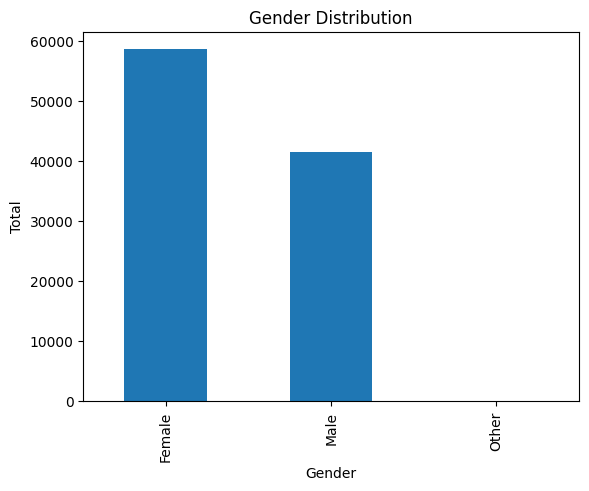

In [10]:
# Show 'gender' Column Distribution Using Bar Chart
gender = diabetes['gender'].value_counts()

gender.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total')

plt.show()

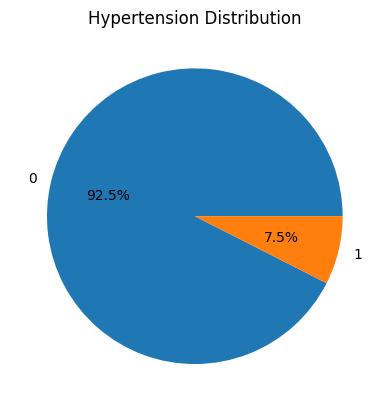

In [11]:
# Show 'hypertension' Column Distribution Using Pie Chart
hypertension = diabetes['hypertension'].value_counts()

hypertension.plot(kind='pie', autopct='%1.1f%%')
plt.title('Hypertension Distribution')
plt.ylabel('')
plt.show()

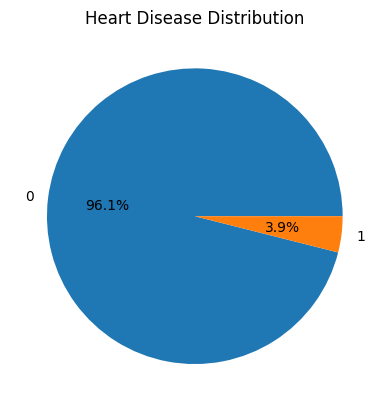

In [12]:
# Show 'heart_disease' Column Distribution Using Pie Chart
heart_disease = diabetes['heart_disease'].value_counts()

heart_disease.plot(kind='pie', autopct='%1.1f%%')
plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.show()

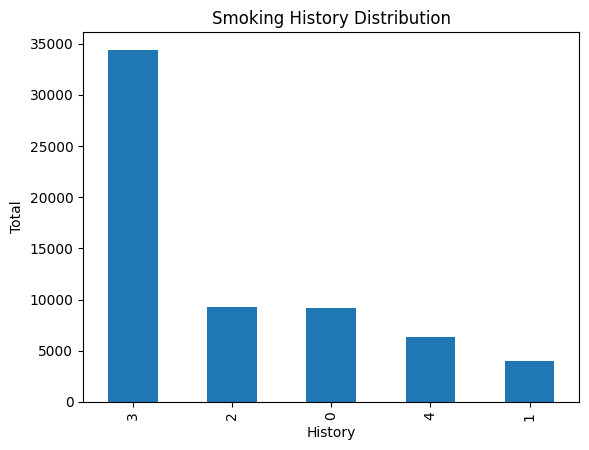

In [31]:
# Show 'smoking_history' Column Distribution Using Bar Chart
smoking_history = diabetes['smoking_history'].value_counts()

smoking_history.plot(kind='bar')
plt.title('Smoking History Distribution')
plt.xlabel('History')
plt.ylabel('Total')
plt.show()

## **DATA PREPROCESSING**

This step is for cleaning and preparing the data before used for model training:
*   Delete duplication and data that is not relevant (e.g. gender "Other")
*   Label Encoding: changing categorical data (gender, smoking_history) to numeric
*   Outliers Handling: using IQR methods to press outliers in numeric features like age, bmi, HbA1c_level, and blood_glucose_level
*   Normalization: Standardize numeric features using StandardScaler to be on a uniform scale

In [14]:
# Drop Duplicate Columns
diabetes = diabetes.drop_duplicates()

In [15]:
# Drop Unnecesary Value on Gender Column
gender_label = diabetes[diabetes['gender'] == 'Other'].index
diabetes.drop(gender_label, inplace=True)

<ipython-input-15-ac7f8f1333a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes.drop(gender_label, inplace=True)


In [16]:
# Drop Unnecesary Value on Smoking History Column
smoking_history_label = diabetes[diabetes['smoking_history'] == 'No Info'].index
diabetes.drop(smoking_history_label, inplace=True)

<ipython-input-16-457380ecfb05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes.drop(smoking_history_label, inplace=True)


In [17]:
# Do Label Encoding for 'Gender' and 'Smoking History' Column
labelEncoder = LabelEncoder()
diabetes['gender'] = labelEncoder.fit_transform(diabetes['gender'])
diabetes['smoking_history'] = labelEncoder.fit_transform(diabetes['smoking_history'])

<ipython-input-17-a83676c616c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes['gender'] = labelEncoder.fit_transform(diabetes['gender'])
<ipython-input-17-a83676c616c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes['smoking_history'] = labelEncoder.fit_transform(diabetes['smoking_history'])


In [18]:
# Outliers Handling
def cap_outliers(diabetes, column):
    Q1 = diabetes[column].quantile(0.25)
    Q3 = diabetes[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    diabetes[column] = diabetes[column].clip(lower_bound, upper_bound)
    return diabetes

for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    diabetes = cap_outliers(diabetes, col)

<ipython-input-18-bb5535a230be>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes[column] = diabetes[column].clip(lower_bound, upper_bound)
<ipython-input-18-bb5535a230be>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes[column] = diabetes[column].clip(lower_bound, upper_bound)
<ipython-input-18-bb5535a230be>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [19]:
# Numeric Feature Normalization
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()

diabetes[features] = scaler.fit_transform(diabetes[features])

<ipython-input-19-5d0d7ec0b72c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes[features] = scaler.fit_transform(diabetes[features])


## **VISUALIZATION AFTER DATA PREPROCESSING**

After completing data preprocessing, re-visualization is performed to:
*   Examine the boxplot of each feature and ensure outliers have been properly handled
*   Explore relationships between each feature using pairplot
*   Analyze the correlation between features using heatmap

These visualizations help to understand the relationship between variables and validate the preprocessing steps.


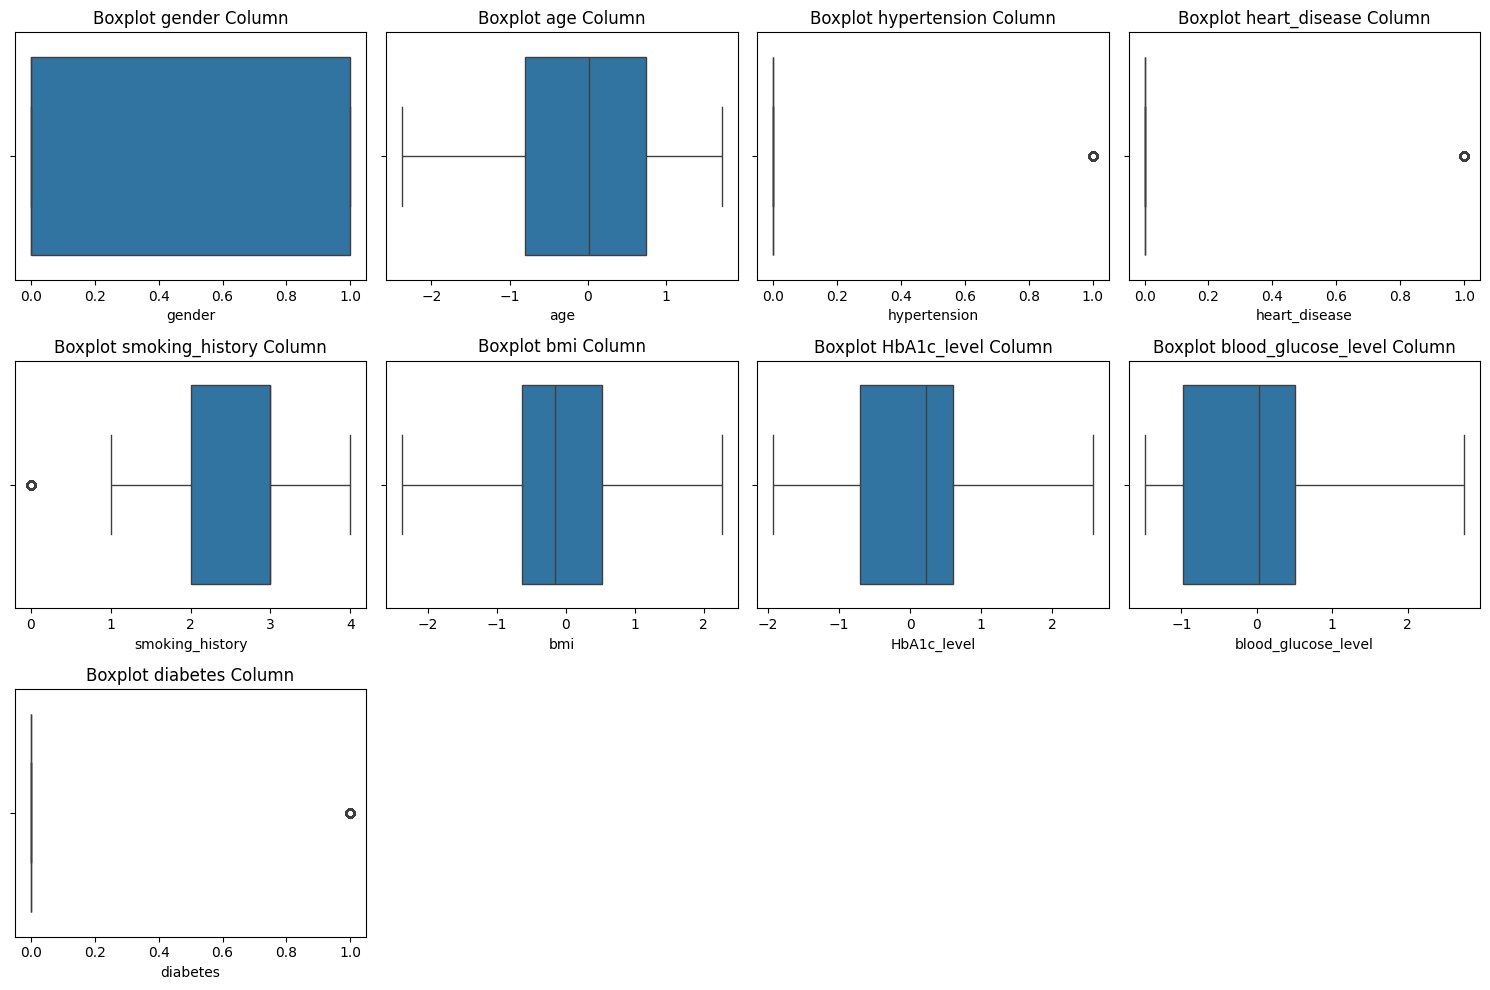

In [20]:
# Boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(diabetes.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=diabetes[col])
    plt.title(f'Boxplot {col} Column')

plt.tight_layout()
plt.show()

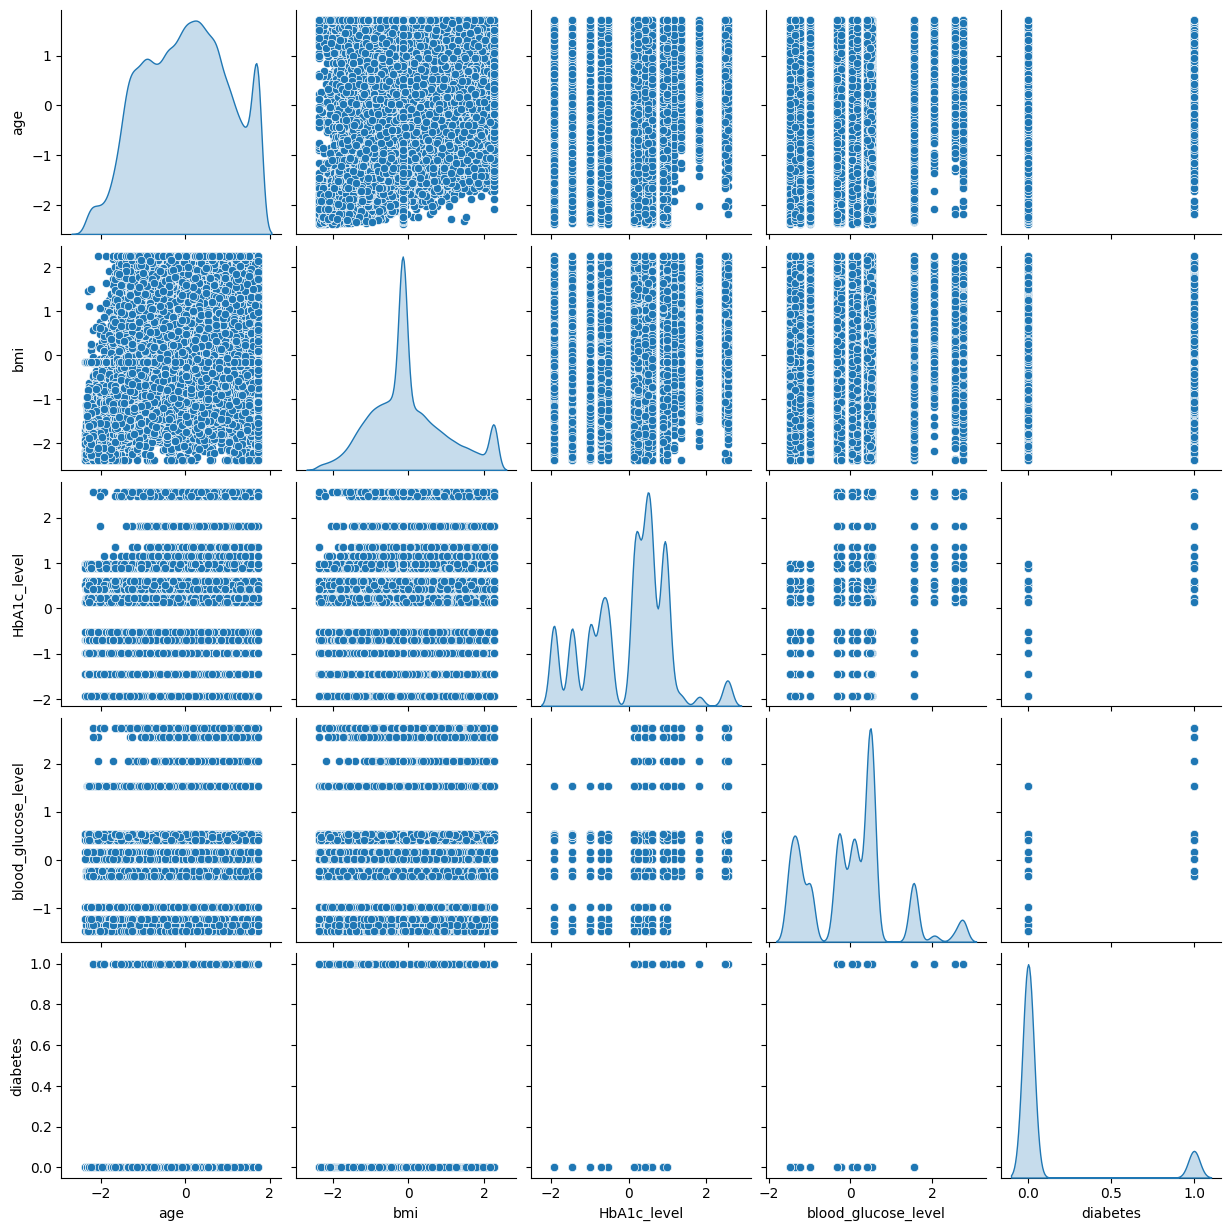

In [21]:
# Pairplot
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
sns.pairplot(diabetes[features], diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix')

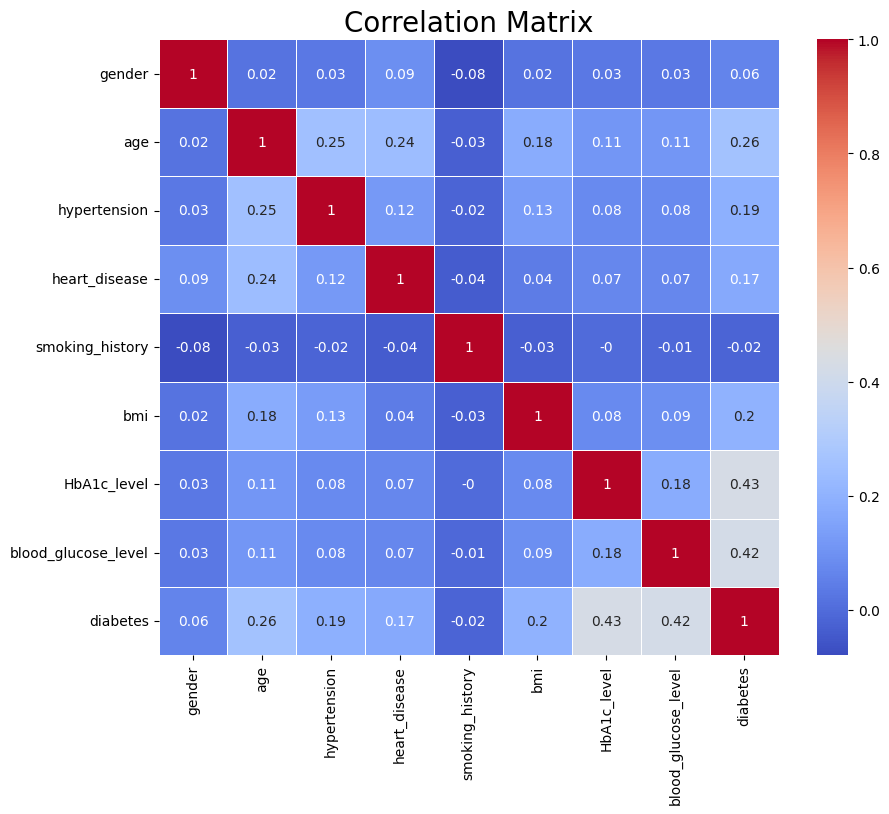

In [22]:
# Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = diabetes.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5, )
plt.title('Correlation Matrix', size=20)

## **DATA SPLITTING**

The data is divided into train and test using train_test_split:
*   Training set: 80% of the data
*   Test set: 20% of the data

It will be used to train the model on a subset of the data (training set) and evaluate its performance on another unseen subset (test set). This helps prevent overfitting and ensures a more objective evaluation of the model's generalization ability.

In [23]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [24]:
print(f'Total sample in whole dataset: {len(X)}')
print(f'Total sample in train dataset: {len(X_train)}')
print(f'Total sample in test dataset: {len(X_test)}')

Total sample in whole dataset: 63247
Total sample in train dataset: 50597
Total sample in test dataset: 12650


## **MODEL TRAINING**

Takes some algorithms used to create a diabetes prediction model, which is:
*   Linear Support Vector Classifier (LinearSVC)
*   Logistic Regression
*   Random Forest Classifier
*   AdaBoost Classifier

Each model was trained using training data and tested using testing data. The accuracy of each model will be compared in the evaluation section.

In [25]:
model_dict = {
    'LinearSVC': LinearSVC(random_state=55),
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1),
    'Boosting': AdaBoostClassifier(learning_rate=0.01, random_state=42)
}

accuracy = pd.DataFrame(columns=['train', 'test'], index=model_dict.keys())

for name, model in model_dict.items():
    model.fit(X_train, y_train)
    accuracy.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    accuracy.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

accuracy

,train,test
LinearSVC,0.948119,0.947273
LogisticRegression,0.947329,0.947194
RandomForest,0.973971,0.962925
Boosting,0.939265,0.940079


## **EVALUATION**

After training, the model is evaluated on the test data to assess its performance in predicting diabetes class from unfamiliar data. The evaluation metrics that will be used are:
1. Classification Report is used to provide detailed metrics such as precision, recall, F1-score, and support of each class
2. Confusion Matrix is used to give a deeper understanding of how the model classifies the data. It shows the number of correct and incorrect predictions for each class.
3. ROC-AUC (Receiver Operating Characteristic - Area Under Curve) is used to evaluate the model's ability to distinguish between positive and negative classes. A higher AUC score indicates a better model for differentiating the diabetes class.

In [27]:
# Classification Report
for name, model in model_dict.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")

Classification Report for LinearSVC:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11243
           1       0.87      0.62      0.72      1407

    accuracy                           0.95     12650
   macro avg       0.91      0.80      0.85     12650
weighted avg       0.94      0.95      0.94     12650



Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11243
           1       0.85      0.64      0.73      1407

    accuracy                           0.95     12650
   macro avg       0.90      0.81      0.85     12650
weighted avg       0.94      0.95      0.94     12650



Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11243
           1       0.98      0.68      0.80      1407

    accuracy                           0.96     1265

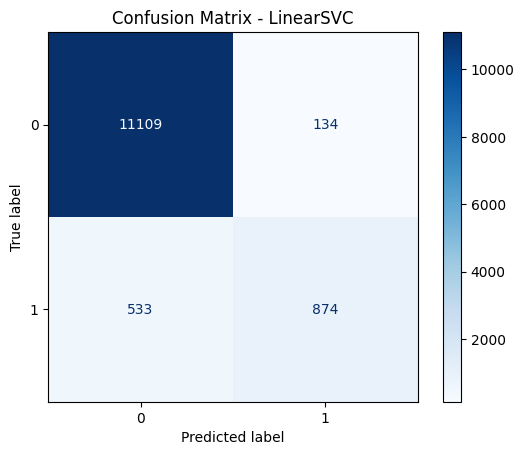

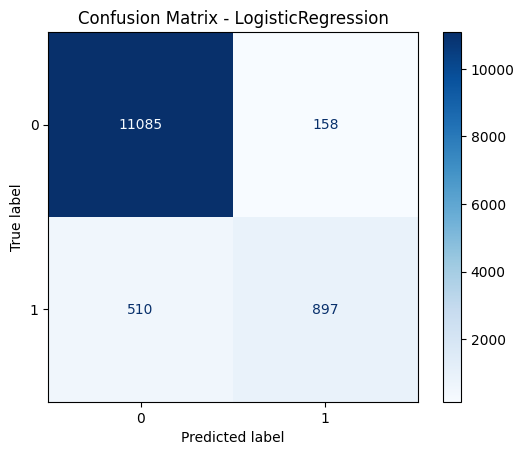

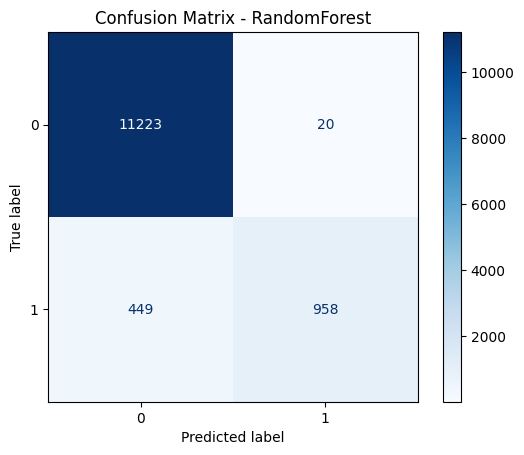

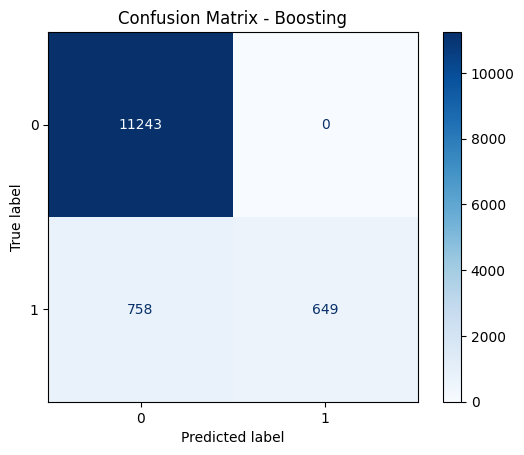

In [28]:
# Confusion Matrix
for name, model in model_dict.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()

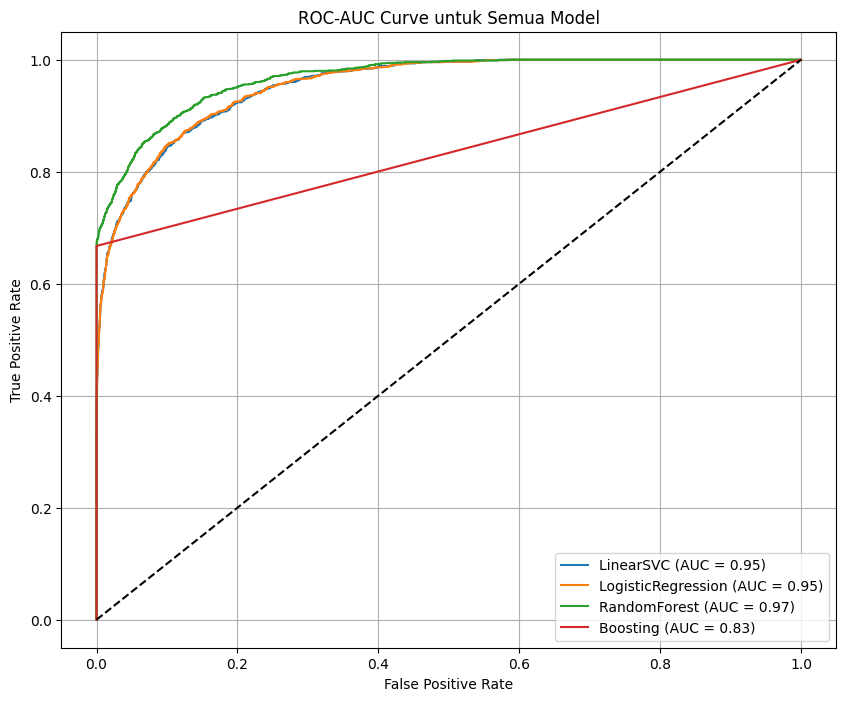

In [29]:
# ROC-AUC
plt.figure(figsize=(10, 8))

for name, model in model_dict.items():
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test)
        else:
            print(f'Model {name} tidak mendukung ROC-AUC (tidak ada predict_proba atau decision_function)')
            continue

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    except Exception as e:
        print(f"Gagal menghitung ROC-AUC untuk model {name}: {e}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve untuk Semua Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## **RESULT**

Each model will predict up to 20,000 samples from the test data and the prediction result will be compared with the labels (y_true). These results can be used for further evaluation or system integration testing.

In [30]:
pred = X_test.copy()
pred_dict = {'y_true': y_test[:20000].values}

for name, model in model_dict.items():
    pred_dict['pred_' + name] = model.predict(pred).round(1)

predictions_diabetes = pd.DataFrame(pred_dict)
predictions_diabetes

,y_true,pred_LinearSVC,pred_LogisticRegression,pred_RandomForest,pred_Boosting
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
12645,0,0,0,0,0
12646,0,0,0,0,0
12647,0,0,0,0,0
12648,0,0,0,0,0
